<a href="https://colab.research.google.com/github/muhammadnurarasy/Project-portfolio/blob/main/Chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install openpyxl

In [2]:
import pandas as pd

# Load the new dataset
file_path = 'BCG X.xlsx'
excel_data = pd.ExcelFile(file_path)

# Checking the sheet names to confirm the structure
sheet_names = excel_data.sheet_names
sheet_names


['Finance']

In [3]:
# Load the 'Finance' sheet to analyze the updated transposed data format
finance_data = excel_data.parse('Finance')

# Display the first few rows to understand the new structure
finance_data.head()


,company,Year,Total Revenue,Total Cost of Revenue,Operating Expense,Net Income,Current Asset,Long Term Asset,Total Asset,Current Liability,Long Term Liability,Total Liability,Total Share Holder Equity,Cash From Operation Activities,Cash From Investment Activities,Cash From Financing Activities
0,Microsoft,2021,168088,52232,45940,61271,184406,149373,333779,88657,103134,191791,141988,76740,-27577,-48486
1,Microsoft,2022,198270,62650,52237,72738,169684,195156,364840,95082,103216,198298,166542,89035,-30311,-58876
2,Microsoft,2023,211915,65863,57529,72361,184257,227719,411976,104149,101604,205753,206223,87582,-22680,-43935
3,Apple,2021,365817,212981,43887,95249,134836,216166,351002,125481,162431,287912,351002,104038,-14545,-93353
4,Apple,2022,394328,223546,51345,88531,135405,217350,352755,153982,148101,302083,352755,122151,-22354,-110749


     company  Year  Gross Margin  Operating Margin  Net Profit Margin  \
0  Microsoft  2021      0.689258          0.726691           0.364517   
1  Microsoft  2022      0.684017          0.736536           0.366863   
2  Microsoft  2023      0.689201          0.728528           0.341462   
3      Apple  2021      0.417794          0.880030           0.260373   
4      Apple  2022      0.433096          0.869791           0.224511   
5      Apple  2023      0.441311          0.856903           0.252167   
6      Tesla  2021      0.252792          0.868402           0.096799   
7      Tesla  2022      0.255984          0.911652           0.149039   
8      Tesla  2023      0.182489          0.909386           0.157224   

   Revenue Growth (%)  Net Income Growth (%)  
0                 NaN                    NaN  
1           17.956071              18.715216  
2            6.882030              -0.518299  
3                 NaN                    NaN  
4            7.793788             

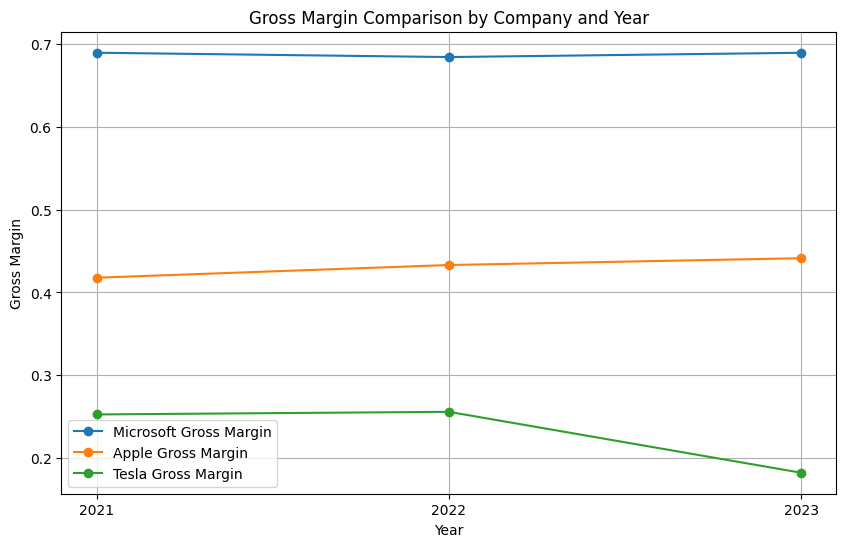

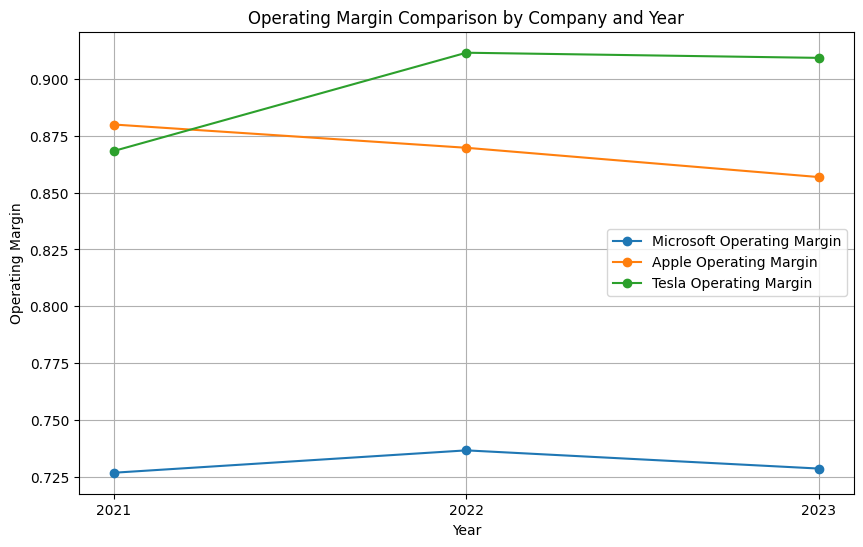

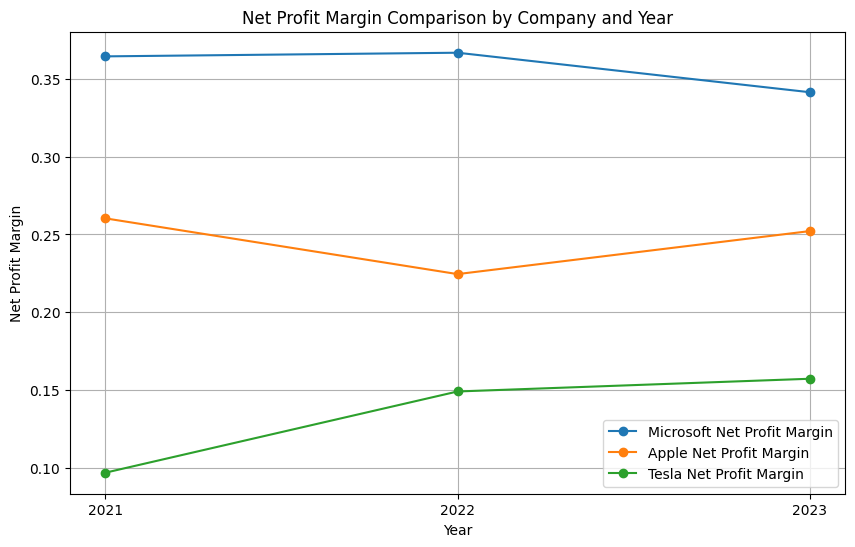

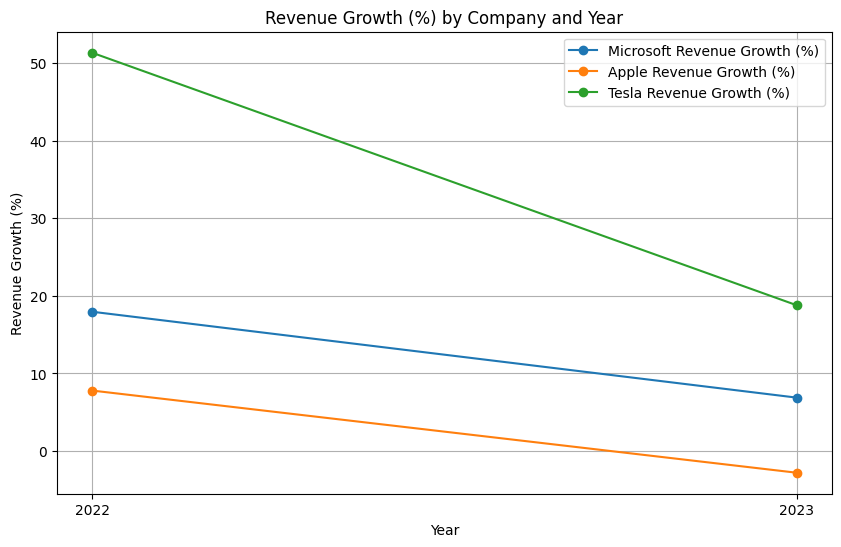

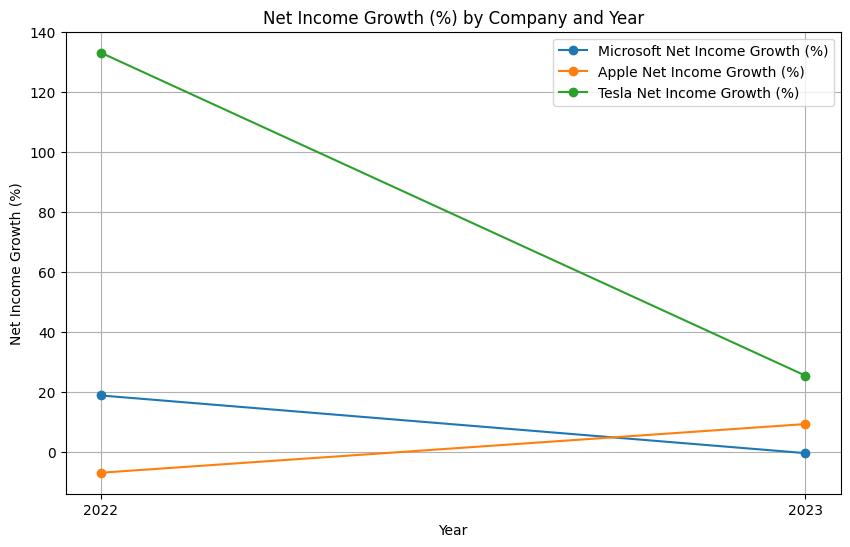


### Summary and Analysis

1. **Gross Margin Comparison**
   - **Definition:** Gross margin represents the percentage of revenue that exceeds the cost of goods sold (COGS). It indicates how efficiently a company uses its resources to produce goods or services.
   - **Summary:**
     - **Microsoft** shows stable gross margins around 68-69% across the years, indicating consistent cost management relative to revenue.
     - **Apple** demonstrates an increasing gross margin from 41.78% to 44.13%, suggesting improved cost efficiency or pricing strategy.
     - **Tesla** shows some fluctuation, with margins decreasing from 25% to 18.25%, possibly due to higher production costs.
   - **Analysis:**
     - **Microsoft's** consistent margin indicates a mature, stable business.
     - **Apple's** improvement suggests strategic cost optimization.
     - **Tesla's** decline might reflect scaling challenges or increased costs.

2. **Operating Margin Comparison**
   - **Definition:** Operating margin measures the percentage of revenue left after covering both COGS and operating expenses.
   - **Summary:**
     - **Microsoft** maintains high and stable margins, reflecting strong expense control.
     - **Apple** shows a slight decline in margin, suggesting rising operational costs.
     - **Tesla** shows improved margin but slight fluctuation, indicating effective cost management.
   - **Analysis:**
     - **Microsoft's** stability shows robust financial management.
     - **Apple** faces slight cost increases but remains highly efficient.
     - **Tesla** demonstrates agility in cost management despite challenges.

3. **Net Profit Margin Comparison**
   - **Definition:** Net profit margin represents the overall profitability after all expenses.
   - **Summary:**
     - **Microsoft** maintains a steady profit margin, indicating stable profitability.
     - **Apple** shows some fluctuation but remains profitable.
     - **Tesla** shows significant improvement in profitability, reflecting growth potential.
   - **Analysis:**
     - **Microsoft** benefits from consistent profitability.
     - **Apple** may need to manage costs more tightly.
     - **Tesla's** upward trend indicates growth potential.

4. **Growth Metrics**
   - **Revenue Growth:** Indicates how much revenue has grown year over year.
   - **Net Income Growth:** Shows the growth in net income, reflecting overall profitability trends.
   - **Summary:**
     - **Microsoft** and **Apple** show moderate growth, with fluctuations.
     - **Tesla** shows higher growth rates, reflecting its expansion phase.

### Overall Insights
- **Microsoft** appears to be a stable, mature company with strong financial management, maintaining consistent margins across all categories.
- **Apple** shows high efficiency and profitability but may face some cost challenges or strategic adjustments, leading to slight fluctuations in margins.
- **Tesla** shows growth potential, improving its profitability over time, but needs to address fluctuations in gross margin, possibly by stabilizing production costs or refining pricing strategies.


In [4]:
import matplotlib.pyplot as plt
from IPython.display import Markdown, display

# Calculate financial ratios
finance_data['Gross Margin'] = (finance_data['Total Revenue'] - finance_data['Total Cost of Revenue']) / finance_data['Total Revenue']
finance_data['Operating Margin'] = (finance_data['Total Revenue'] - finance_data['Operating Expense']) / finance_data['Total Revenue']
finance_data['Net Profit Margin'] = finance_data['Net Income'] / finance_data['Total Revenue']

# Calculate growth metrics
finance_data['Revenue Growth (%)'] = finance_data.groupby('company')['Total Revenue'].pct_change() * 100
finance_data['Net Income Growth (%)'] = finance_data.groupby('company')['Net Income'].pct_change() * 100

# Print calculated metrics to verify
print(finance_data[['company', 'Year', 'Gross Margin', 'Operating Margin', 'Net Profit Margin',
                    'Revenue Growth (%)', 'Net Income Growth (%)']])

# Convert the 'Year' column to a string to prevent decimal formatting in the charts
finance_data['Year'] = finance_data['Year'].astype(str)

# Visualization: Plot each margin and growth metrics for all companies

# Gross Margin Comparison
plt.figure(figsize=(10, 6))
for company in finance_data['company'].unique():
    company_data = finance_data[finance_data['company'] == company]
    plt.plot(company_data['Year'], company_data['Gross Margin'], marker='o', label=f'{company} Gross Margin')
plt.title('Gross Margin Comparison by Company and Year')
plt.xlabel('Year')
plt.ylabel('Gross Margin')
plt.legend()
plt.grid(True)
plt.show()

# Operating Margin Comparison
plt.figure(figsize=(10, 6))
for company in finance_data['company'].unique():
    company_data = finance_data[finance_data['company'] == company]
    plt.plot(company_data['Year'], company_data['Operating Margin'], marker='o', label=f'{company} Operating Margin')
plt.title('Operating Margin Comparison by Company and Year')
plt.xlabel('Year')
plt.ylabel('Operating Margin')
plt.legend()
plt.grid(True)
plt.show()

# Net Profit Margin Comparison
plt.figure(figsize=(10, 6))
for company in finance_data['company'].unique():
    company_data = finance_data[finance_data['company'] == company]
    plt.plot(company_data['Year'], company_data['Net Profit Margin'], marker='o', label=f'{company} Net Profit Margin')
plt.title('Net Profit Margin Comparison by Company and Year')
plt.xlabel('Year')
plt.ylabel('Net Profit Margin')
plt.legend()
plt.grid(True)
plt.show()

# Revenue Growth (%) Comparison
plt.figure(figsize=(10, 6))
for company in finance_data['company'].unique():
    company_data = finance_data[finance_data['company'] == company]
    plt.plot(company_data['Year'], company_data['Revenue Growth (%)'], marker='o', label=f'{company} Revenue Growth (%)')
plt.title('Revenue Growth (%) by Company and Year')
plt.xlabel('Year')
plt.ylabel('Revenue Growth (%)')
plt.legend()
plt.grid(True)
plt.show()

# Net Income Growth (%) Comparison
plt.figure(figsize=(10, 6))
for company in finance_data['company'].unique():
    company_data = finance_data[finance_data['company'] == company]
    plt.plot(company_data['Year'], company_data['Net Income Growth (%)'], marker='o', label=f'{company} Net Income Growth (%)')
plt.title('Net Income Growth (%) by Company and Year')
plt.xlabel('Year')
plt.ylabel('Net Income Growth (%)')
plt.legend()
plt.grid(True)
plt.show()


# Define the summary text
summary_text = """
### Summary and Analysis

1. **Gross Margin Comparison**
   - **Definition:** Gross margin represents the percentage of revenue that exceeds the cost of goods sold (COGS). It indicates how efficiently a company uses its resources to produce goods or services.
   - **Summary:**
     - **Microsoft** shows stable gross margins around 68-69% across the years, indicating consistent cost management relative to revenue.
     - **Apple** demonstrates an increasing gross margin from 41.78% to 44.13%, suggesting improved cost efficiency or pricing strategy.
     - **Tesla** shows some fluctuation, with margins decreasing from 25% to 18.25%, possibly due to higher production costs.
   - **Analysis:**
     - **Microsoft's** consistent margin indicates a mature, stable business.
     - **Apple's** improvement suggests strategic cost optimization.
     - **Tesla's** decline might reflect scaling challenges or increased costs.

2. **Operating Margin Comparison**
   - **Definition:** Operating margin measures the percentage of revenue left after covering both COGS and operating expenses.
   - **Summary:**
     - **Microsoft** maintains high and stable margins, reflecting strong expense control.
     - **Apple** shows a slight decline in margin, suggesting rising operational costs.
     - **Tesla** shows improved margin but slight fluctuation, indicating effective cost management.
   - **Analysis:**
     - **Microsoft's** stability shows robust financial management.
     - **Apple** faces slight cost increases but remains highly efficient.
     - **Tesla** demonstrates agility in cost management despite challenges.

3. **Net Profit Margin Comparison**
   - **Definition:** Net profit margin represents the overall profitability after all expenses.
   - **Summary:**
     - **Microsoft** maintains a steady profit margin, indicating stable profitability.
     - **Apple** shows some fluctuation but remains profitable.
     - **Tesla** shows significant improvement in profitability, reflecting growth potential.
   - **Analysis:**
     - **Microsoft** benefits from consistent profitability.
     - **Apple** may need to manage costs more tightly.
     - **Tesla's** upward trend indicates growth potential.

4. **Growth Metrics**
   - **Revenue Growth:** Indicates how much revenue has grown year over year.
   - **Net Income Growth:** Shows the growth in net income, reflecting overall profitability trends.
   - **Summary:**
     - **Microsoft** and **Apple** show moderate growth, with fluctuations.
     - **Tesla** shows higher growth rates, reflecting its expansion phase.

### Overall Insights
- **Microsoft** appears to be a stable, mature company with strong financial management, maintaining consistent margins across all categories.
- **Apple** shows high efficiency and profitability but may face some cost challenges or strategic adjustments, leading to slight fluctuations in margins.
- **Tesla** shows growth potential, improving its profitability over time, but needs to address fluctuations in gross margin, possibly by stabilizing production costs or refining pricing strategies.
"""

# Display the summary in Markdown format
display(Markdown(summary_text))


In [8]:


# Prepare the unique company list and predefined questions
company_list = finance_data['company'].unique().tolist()
predefined_questions = [
    "What is the total revenue?",
    "How has net income changed over the last year?",
    "What are the total assets?",
    "What are the total liabilities?",
    "What is the cash flow from operating activities?"
]

# Define the chatbot response function
def chatbot_response(company, user_query):
    if user_query in responses:
        result = responses[user_query](company)
    else:
        result = "Sorry, I can only provide information on predefined queries."

    # Display the result
    print(f"\nResponse: {result}\n")

# Define responses dictionary
responses = {
    "What is the total revenue?": lambda company: f"The total revenue for {company} is {finance_data[finance_data['company'] == company]['Total Revenue'].iloc[-1]:,.2f}.",
    "How has net income changed over the last year?": lambda company: f"The net income for {company} has {'increased' if finance_data[finance_data['company'] == company]['Net Income Growth (%)'].iloc[-1] > 0 else 'decreased'} by {abs(finance_data[finance_data['company'] == company]['Net Income Growth (%)'].iloc[-1]):.2f}% over the last year.",
    "What are the total assets?": lambda company: f"The total assets for {company} are {finance_data[finance_data['company'] == company]['Total Assets'].iloc[-1]:,.2f}.",
    "What are the total liabilities?": lambda company: f"The total liabilities for {company} are {finance_data[finance_data['company'] == company]['Total Liabilities'].iloc[-1]:,.2f}.",
    "What is the cash flow from operating activities?": lambda company: f"The cash flow from operating activities for {company} is {finance_data[finance_data['company'] == company]['Cash Flow from Operating Activities'].iloc[-1]:,.2f}."
}

# Function to start the chatbot interaction
def start_chatbot():
    print("Welcome to the Financial Chatbot!")
    print("Companies available:", ", ".join(company_list))
    print("Questions you can ask:", ", ".join(predefined_questions))

    # Get valid company input
    while True:
        company = input("\nEnter the company name (e.g., Microsoft, Tesla, Apple): ")
        if company in company_list:
            break
        else:
            print("Invalid company name. Please choose from:", ", ".join(company_list))

    # Get valid question input
    while True:
        user_query = input("\nAsk a financial question: ")
        if user_query in predefined_questions:
            break
        else:
            print("Invalid question. Please choose from:", ", ".join(predefined_questions))

    # Provide the chatbot response
    chatbot_response(company, user_query)




In [11]:
# Start the chatbot
start_chatbot()

Welcome to the Financial Chatbot!
Companies available: Microsoft, Apple, Tesla
Questions you can ask: What is the total revenue?, How has net income changed over the last year?, What are the total assets?, What are the total liabilities?, What is the cash flow from operating activities?

Enter the company name (e.g., Microsoft, Tesla, Apple): Microsoft

Ask a financial question: What is the total revenue?

Response: The total revenue for Microsoft is 211,915.00.

